In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm,preprocessing
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [2]:
salary_train = pd. read_csv("E:/ExcelR/Assignments/Data Science Assignments/17.Support Vector Machines/SalaryData_Train.csv")
salary_test = pd. read_csv("E:/ExcelR/Assignments/Data Science Assignments/17.Support Vector Machines/SalaryData_Test.csv")
salary = pd.concat([salary_train,salary_test],axis = 0)
salary.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
#shape of data
salary.shape

(45221, 14)

In [4]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45221 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [5]:
salary.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,10.118463,1101.454700,88.548617,40.938038
std,13.217981,2.552909,7506.511295,404.838249,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


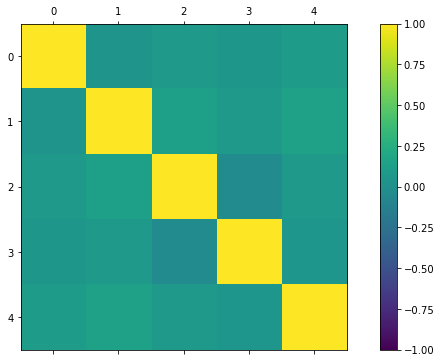

In [6]:
# correlation matrix
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
cax = ax.matshow(salary.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show();

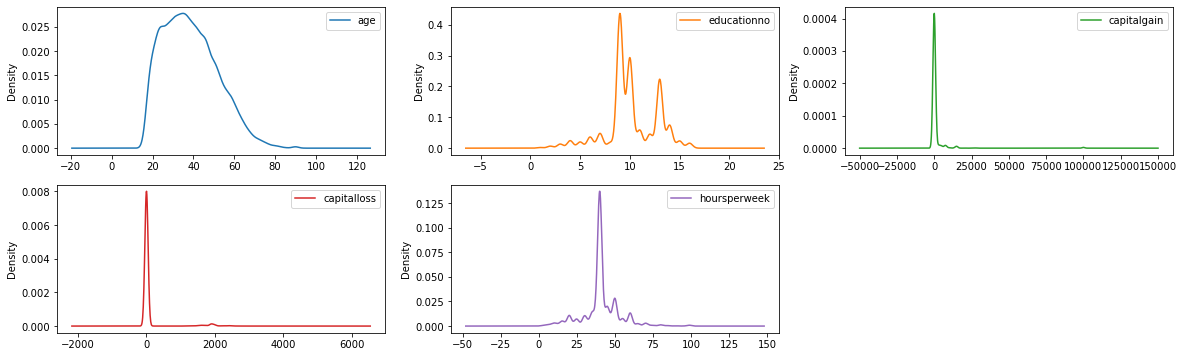

In [7]:
salary.plot(kind="kde",subplots=True,layout=(2,3),sharex=False,sharey=False,figsize=(20,6))
plt.show();

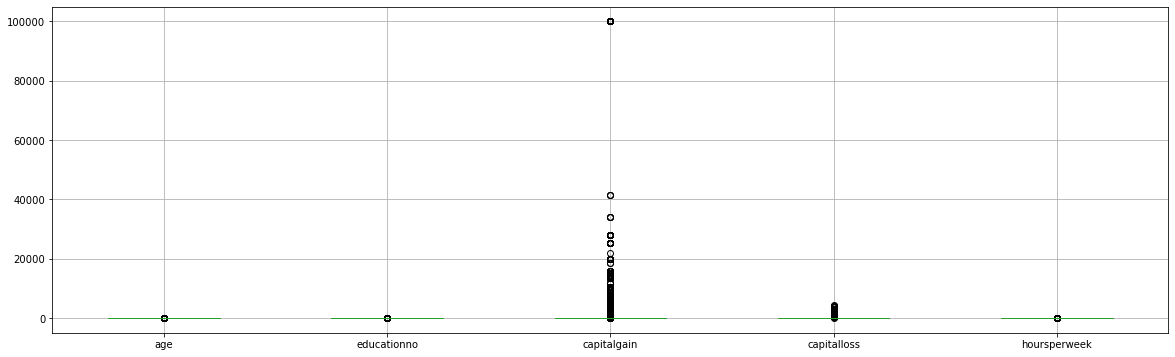

In [8]:
salary.boxplot(figsize=(20, 6));

In [9]:
# Applying lable encoder to Salary column (Y Variable which is Categorial) and sex coloumn for both train and test data set
label_encoder = preprocessing.LabelEncoder() #<=50K :0 & >50K :1 for salary ; Male :1 & Female :0 for sex
salary_train["Salary"] = label_encoder.fit_transform(salary_train["Salary"]) 
salary_test["Salary"] = label_encoder.fit_transform(salary_test["Salary"]) 
salary_train["sex"] = label_encoder.fit_transform(salary_train["sex"]) 
salary_test["sex"] = label_encoder.fit_transform(salary_test["sex"]) 

# Dummies for X Variables
salary_train = pd.get_dummies(salary_train)
salary_test = pd.get_dummies(salary_test)
salary_train.head()

,age,educationno,sex,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,1,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,1,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,1,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,7,1,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
salary_train.Salary.value_counts(),salary_test.Salary.value_counts()

(0    22653
 1     7508
 Name: Salary, dtype: int64,
 0    11360
 1     3700
 Name: Salary, dtype: int64)

In [11]:
# Dividing our data into X and Y variables for train as well as test dataset
X_train = pd.concat([salary_train.iloc[:,0:6],salary_train.iloc[:,7:]],axis = 1)
Y_train = salary_train.iloc[:,6]
X_test = pd.concat([salary_test.iloc[:,0:6],salary_test.iloc[:,7:]],axis = 1)
Y_test = salary_test.iloc[:,6]

In [12]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((30161, 101), (30161,), (15060, 101), (15060,))

**Grid Search CV**

In [13]:
model = SVC()
param_grid = [{"kernel":["rbf","linear"],"C":[10,50,100] }] 
gsv = GridSearchCV(estimator = model,param_grid = param_grid,scoring = "accuracy",cv = 10,verbose=10)
gsv.fit(X_train,Y_train)

print("Best: %f using %s" %
      (gsv.best_score_, gsv.best_params_))

Best: 0.8123333333333331 using {'C': 10, 'kernel': 'rbf'}

**Support Vector Classification**

              precision    recall  f1-score   support

           0       0.98      0.80      0.88     13916
           1       0.26      0.85      0.40      1144

    accuracy                           0.81     15060
   macro avg       0.62      0.82      0.64     15060
weighted avg       0.93      0.81      0.85     15060

Training set score - 80.6605 % 
Test set score     - 80.6773 %
Accuracy           - 80.68 %


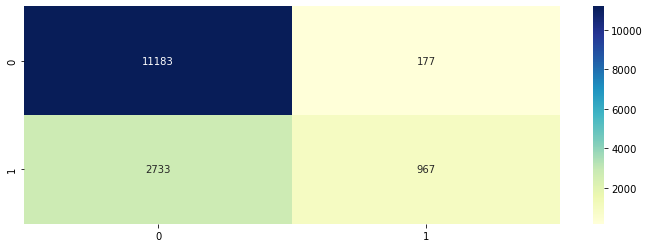

In [14]:
# inputing best values and checking its accuracy  
clf = SVC(C= 10, kernel="rbf")
clf.fit(X_train , Y_train)
Y_pred = clf.predict(X_test)
print(classification_report(Y_pred,Y_test))
print("Training set score - {:.4f}".format(clf.score(X_train, Y_train)*100),"%",
      "\nTest set score     - {:.4f}".format(clf.score(X_test, Y_test)*100),"%")
acc = accuracy_score(Y_test, Y_pred) * 100
print("Accuracy           -",round(acc,2),"%")
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(confusion_matrix(Y_test, Y_pred), square=False,annot=True,fmt = "d", cmap='YlGnBu');

**With an accuracy of approx 80% this model is good to predict.**